In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42) # 42 as default?
time_steps = 100  # Number of time steps
x = np.linspace(0, 50, time_steps)
y = np.sin(x) + np.random.normal(scale=0.9, size=time_steps)  # Sine wave with noise


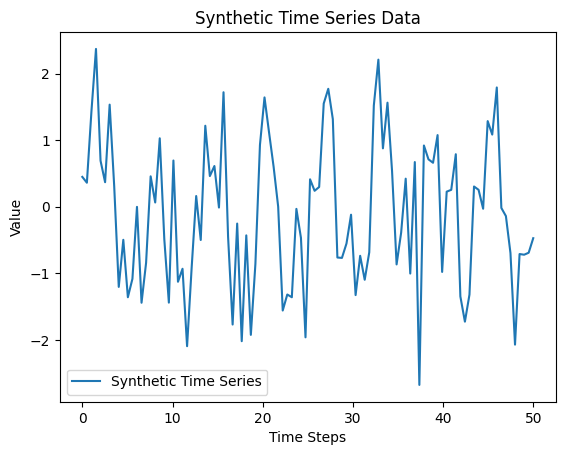

In [38]:
# Plot the synthetic time series data
plt.plot(x, y, label='Synthetic Time Series')
plt.title('Synthetic Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data (normalizing to the range [0,1])
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [3]:

def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 20])
    return np.array(X), np.array(y)

# Define time step window (how many past time steps the model will consider)
time_step_window = 10

X, y = create_sequences(y_scaled, time_step_window)

# Reshape X for LSTM: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f'Shape of X: {X.shape}')  # X shape should be (samples, time steps, features)
print(f'Shape of y: {y.shape}')  # y shape should be (samples,)


Shape of X: (90, 10, 1)
Shape of y: (90,)


In [4]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initialize the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step_window, 1)))
model.add(LSTM(units=50, return_sequences=False))

# Add a dense layer for output
model.add(Dense(units=1))

model.compile(optimizer='ada', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=16, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.3208 - val_loss: 0.1462
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1987 - val_loss: 0.1614
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1543 - val_loss: 0.1711
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1572 - val_loss: 0.1354
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1331 - val_loss: 0.1205
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1313 - val_loss: 0.1182
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1198 - val_loss: 0.1177
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1203 - val_loss: 0.1200
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1071 - val_loss: 0.1175
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1079 - val_loss: 0.1088
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1024 - val_loss: 0.0947
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0941 - val_loss: 0.0901


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


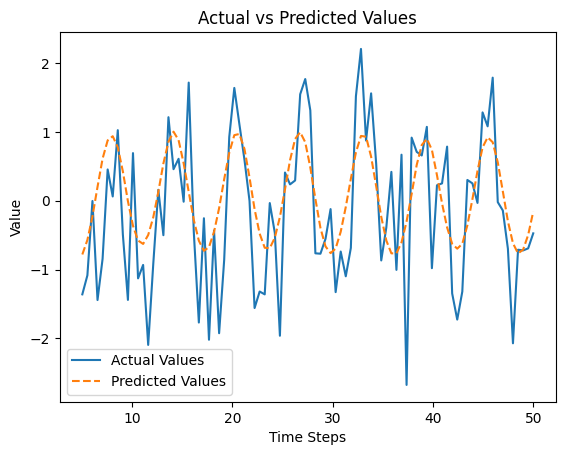

In [39]:
# Predict the next values using the trained model
predicted_values = model.predict(X)

predicted_values_unscaled = scaler.inverse_transform(predicted_values)

# Plot the actual vs predicted values
plt.plot(x[time_step_window:], y[time_step_window:10], label='Actual Values')
plt.plot(x[time_step_window:], predicted_values_unscaled, label='Predicte Values', linestyle='dashed')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE between actual and predicted values
rmse = np.sqrt(mean_squared_error(y[time_step_window:], predicted_values_unscaled))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Root Mean Squared Error (RMSE): 0.8453
